__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import itertools

In [45]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
              [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
              [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
              [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
              [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
              [-0.62972637, 0.77750764, 2.84124027, 4.54410559],
              [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
              [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
              [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
              [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
              7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [51]:
a = np.array(range(X.shape[1])) 
Res = [(0,0), 0] 
for i in list(itertools.combinations(a, 2)): 
    x1 = X[:, i] 
    x1 = np.hstack((np.ones((x1.shape[0], 1)), x1)) 
    XTX = x1.T.dot(x1) 
    XTX_inv = np.linalg.inv(XTX)  
    b = XTX_inv.dot(x1.T).dot(y) 
    z1 = x1.dot(b) 
    e1 = y - z1 
    R1 = 1 - e1.var() / y.var() 
    if R1 > Res[1]:
        Res[0] = i
        Res[1] = R1
print(f'Максимальный коэффициент детерминации: {round(Res[1], 4)} при сочетании признаков {Res[0]}')

Максимальный коэффициент детерминации: 0.7634 при сочетании признаков (0, 2)


In [52]:
n = x1.shape[0] 
m = 1
k1 = m 
k2 = n - m - 1
alpha = 0.05 
t = stats.f.ppf(1 - alpha, k1, k2) 
F = (R1 / k1) / ((1 - R1) / k2) 
if F > t: 
    print('Статистика попала в критическую область, уравнение регрессии не признаётся значимым.')
else:
    print('Статистика не попала в критическую область, уравнение регрессии признаётся значимым.')

Статистика попала в критическую область, уравнение регрессии не признаётся значимым.


__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

In [7]:
alpha = 0.05


res_A = 77 / 2509
res_B = 60 / 1465
res_AB = (77 + 60) / (2509 + 1465)
res_A, res_B, res_AB  

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [12]:
F = res_AB / res_B 
F


0.8417421573561483

In [13]:
t1 = stats.norm.ppf(alpha/2)
t2 = stats.norm.ppf(1 - alpha/2)
t1, t2        

(-1.9599639845400545, 1.959963984540054)

Значение статистики не попало в критическую область, значит, гипотеза подтвердилась и изменение не является статистически значимым. 

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [14]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]) 

In [27]:
print(f'Выборочное среднее:  \n {x1.mean()}, {y1.mean()}, \n {x2.mean()}, {y2.mean()},  \n {x3.mean()}, {y3.mean()},  \n {x4.mean()}, {y4.mean()}')

Выборочное среднее:  
 9.0, 7.500909090909093, 
 9.0, 7.50090909090909,  
 9.0, 7.5,  
 9.0, 7.500909090909091


In [28]:
print(f'Дисперсия: \n {x1.var()}, {y1.var()}, \n {x2.var()}, {y2.var()}, \n {x3.var()}, {y3.var()}, \n {x4.var()}, {y4.var()}')

Дисперсия: 
 10.0, 3.7520628099173554, 
 10.0, 3.752390082644628, 
 10.0, 3.747836363636364, 
 10.0, 3.7484082644628103


In [36]:
print(f'Коэффициент корреляции Пирсона: \n {np.corrcoef(x1, y1)[1][0]}, \n {np.corrcoef(x2, y2)[1][0]}, \n {np.corrcoef(x3, y3)[1][0]}, \n {np.corrcoef(x4, y4)[1][0]}')

Коэффициент корреляции Пирсона: 
 0.8164205163448399, 
 0.8162365060002428, 
 0.8162867394895984, 
 0.8165214368885029


In [42]:
print('Прямая линейной регрессии:')
b11 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0)
b01 = y1.mean() - b11 * x1.mean()
print(f'y = {b01} + {b11}x')
b12 = np.cov(x2, y2, ddof=0)[0, 1] / np.var(x2, ddof=0)
b02 = y2.mean() - b12 * x2.mean()
print(f'y = {b02} + {b12}x')
b13 = np.cov(x3, y3, ddof=0)[0, 1] / np.var(x3, ddof=0)
b03 = y3.mean() - b13 * x3.mean()
print(f'y = {b03} + {b13}x')
b14 = np.cov(x4, y4, ddof=0)[0, 1] / np.var(x4, ddof=0)
b04 = y4.mean() - b14 * x4.mean()
print(f'y = {b04} + {b14}x')
print()


Прямая линейной регрессии:
y = 3.0000909090909103 + 0.5000909090909091x
y = 3.000909090909089 + 0.5000000000000001x
y = 3.002454545454544 + 0.4997272727272729x
y = 3.0017272727272726 + 0.4999090909090909x



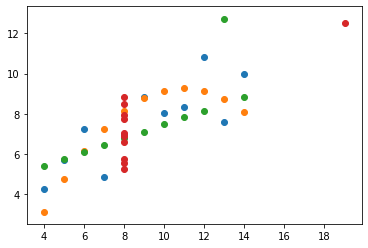

In [43]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)
plt.show()

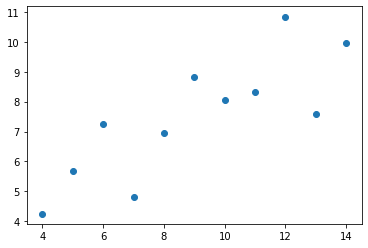

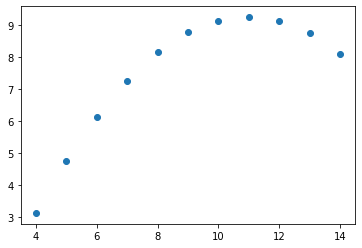

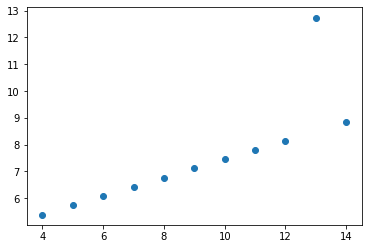

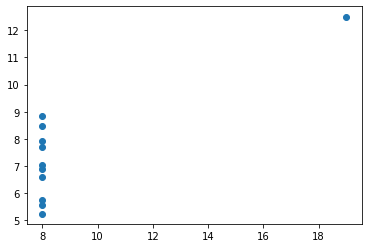

In [44]:
plt.scatter(x1, y1)
plt.show()
plt.scatter(x2, y2)
plt.show()
plt.scatter(x3, y3)
plt.show()
plt.scatter(x4, y4)
plt.show()